# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yaspin Andika M. Nur Cholis
- **Email:** andikayaspin@gmail.com
- **ID Dicoding:** yaspin

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata penggunaan sepeda di hari kerja dan akhir pekan?
- Berapa rata-rata penggunaan sepeda saat hari libur holiday dan bukan hari libur?
- Bagaimana distribusi pennyewaan sepeda terdaftar dan kasual dalam hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Melihat dari day_df dan hour_df hanya ada satu table berbeda yaitu pada table hr (hour) maka kita akan drop hour_df

In [13]:
del hour_df

Menghapus kolom yang kurang relevan

In [14]:
drop_col = ['instant', 'temp', 'atemp', 'hum', 'windspeed']

day_df.drop(columns=drop_col, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


Mengubah tipe data

In [15]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [16]:
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df['weather_situation'] = day_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


In [17]:
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')

day_df['dateday'] = pd.to_datetime(day_df.dateday)

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   casual             731 non-null    int64         
 9   registered         731 non-null    int64         
 10  count              731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(3)
memory usage: 29.4 KB


## Exploratory Data Analysis (EDA)

### Explore day_df

In [19]:
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-19-a564179bbc84>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

In [20]:
day_df.groupby(by='year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-20-6e9141151fa7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='year').agg({


count                           
       max  min         mean      sum
year                                 
0     6043  431  3405.761644  1243103
1     8714   22  5599.934426  2049576

In [21]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-21-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [22]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-22-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [23]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-23-003790dec043>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

In [24]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-24-41ebf141658b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

# **Kesimpulan**

*   Penyewaan sepeda paling banyak terjadi saat musim **Fall** dan paling sedikit terjaid pada musim **Spring**.
*   Penyewaan sepeda juga semakin bertambah di tahun 2011 berjumlah **1.243.103** Penyewa dan pada 2012 bertambah menjadi **2.049.576** Penyewa. Naik hingga **68%**.
*   Penyewaan sepeda **paling banyak** terjadi di bulan **Agustus** dengan **351.194** penyewaan, sementara yang **paling rendah** terjadi di bulan **Januari** Dengan **134.933** penyewaan.
*   Penyewaan paling rendah dan paling tinggi terjadi bukan saat libur nasional (hari biasa) yaitu paling rendah berjumlah **22** penyewa dan tertinggi di **8.714** penyewa.
*   Tidak terlalu signifikan untuk total penyewaan ke semua data harian, yang paling menonjol disini adalah penyewaan terendah terjadi di hari **Senin (Mon)** dan paling tinggi ada di hari **Sabtu (Sat)**.
*   Tetap hari kerja masih menjadi total penyewaan terbanyak dengan **2.292410** penyewa, sementara hari libur hanya menyumbang total **1.000.269** penyewa. Dan dari data ini juga bisa dilihat penyewaan terkecil terjadi saat hari kerja, sementara penyewaan tertinggi terjadi di hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata penggunaan sepeda di hari kerja dan akhir pekan?

<ipython-input-25-d12d87f0a220>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_trend = day_df.groupby('workingday')['count'].mean()
<ipython-input-25-d12d87f0a220>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_trend.index, y=workingday_trend.values, palette="Set2")


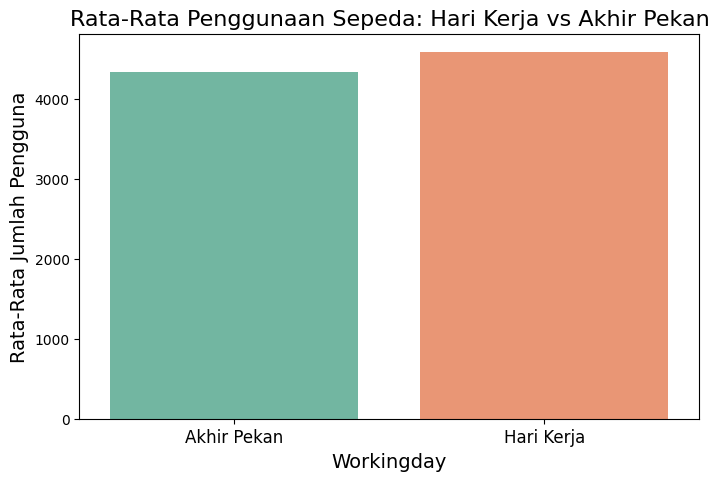

In [25]:
workingday_trend = day_df.groupby('workingday')['count'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=workingday_trend.index, y=workingday_trend.values, palette="Set2")
plt.title("Rata-Rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan", fontsize=16)
plt.xlabel("Workingday", fontsize=14)
plt.ylabel("Rata-Rata Jumlah Pengguna", fontsize=14)
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'], fontsize=12)
plt.show()

### Pertanyaan 2: Berapa rata-rata penggunaan sepeda saat hari libur holiday dan bukan hari libur?

<ipython-input-26-f303653181c6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_trend = day_df.groupby('holiday')['count'].mean()
<ipython-input-26-f303653181c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_trend.index, y=holiday_trend.values, palette="Blues")


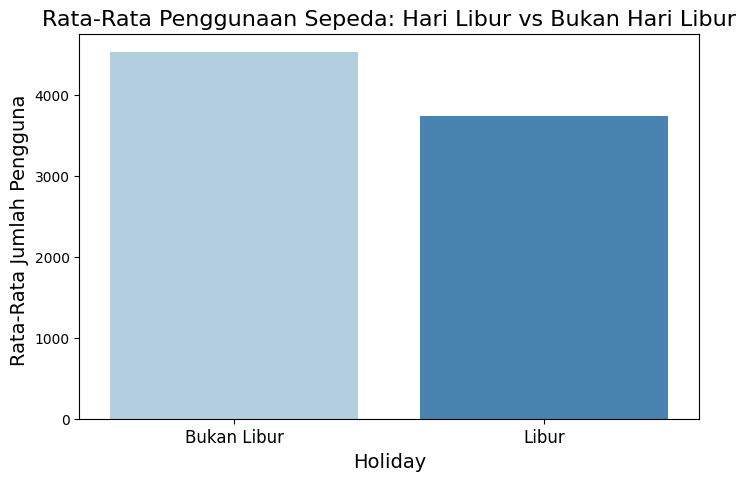

In [26]:
holiday_trend = day_df.groupby('holiday')['count'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=holiday_trend.index, y=holiday_trend.values, palette="Blues")
plt.title("Rata-Rata Penggunaan Sepeda: Hari Libur vs Bukan Hari Libur", fontsize=16)
plt.xlabel("Holiday", fontsize=14)
plt.ylabel("Rata-Rata Jumlah Pengguna ", fontsize=14)
plt.xticks([0, 1], ['Bukan Libur', 'Libur'], fontsize=12)
plt.show()

### Pertanyaan 3:  Bagaimana distribusi pennyewaan sepeda terdaftar dan kasual dalam hari kerja dan akhir pekan?

<ipython-input-27-4a7254e123d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='workingday', y='casual', palette='Set3')


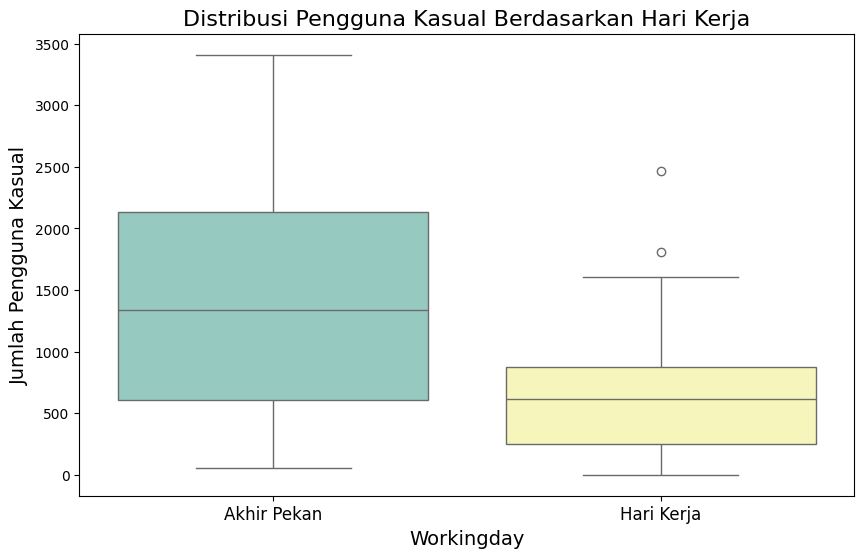

<ipython-input-27-4a7254e123d2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='workingday', y='registered', palette='Set3')


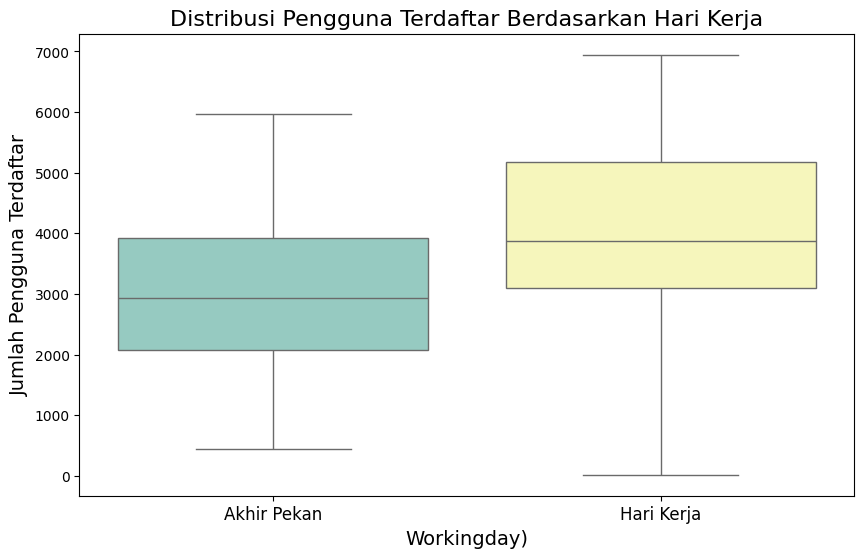

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='workingday', y='casual', palette='Set3')
plt.title("Distribusi Pengguna Kasual Berdasarkan Hari Kerja", fontsize=16)
plt.xlabel("Workingday", fontsize=14)
plt.ylabel("Jumlah Pengguna", fontsize=14)
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'], fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='workingday', y='registered', palette='Set3')
plt.title("Distribusi Pengguna Terdaftar Berdasarkan Hari Kerja", fontsize=16)
plt.xlabel("Workingday)", fontsize=14)
plt.ylabel("Jumlah Pengguna", fontsize=14)
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'], fontsize=12)
plt.show()

## Conclusion

*   Conclusion pertanyaan 1: Dapat dilihat rata-rata penyewaan sepeda di Hari Kerja dan Akhir pekan memiliki jumlah yang sama-sama diatas 4000/hari lebih banyak penggunaan rata-rata di hari kerja dibandingkan dengan akhir pekan.
*   Conclusion pertanyaan 2: Dapat dilihat rata-rata penyewaan sepeda di hari bukan libur (holiday) lebih banyak dibandingkan holiday, jika dilihat lagi rata-rata penyewaan sepeda di hari libur (holiday) hanya mencapai 3.000 sekian perhari tidak seperti hari bukan libur (holiday) yang hampir mencapai rata rata 5.000/hari.
*   Conclusion pertanyaan 3: Dapat dilihat bahwa pengguna kasual mempunyai rentang 600-2.000 penyewa di akhir pekan lebih ramai dibandingkan pengguna kasual di hari kerja yang rentang penyewaan nya bahkan tidak sampai 1.000, sementara pengguna terdaftar terjadi hal sebaliknya dimana lebih ramai penyewaan di hari kerja dengan rentang penyewaan 3.000-5.000 sementara di akhir pekan penyewaan hanya berkisar di 2.000-4.000 oleh pengguna terdaftar.

In [29]:
day_df.to_csv("day_df.csv", index=False)